# Lab 2 - Pandas och data processing

## Assignment summary:
Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera matplotlib grafer
i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att referera till dem.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar mm.

___

### Assignment 1

##### Importing necessary libraries and modules

I start by importing all the necessary libraries and modules that I need further down in the code.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

##### Dataframe creation

Here I use pandas to create dataframes for each sheet/page in the excel-file, and store these in separate variables, followed by storing them in a list for easy iteration.

In [182]:
# Read the data from each sheet in the XLSX file and store in separate dataframes
df_eng = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Engelska', header=8)
df_sve = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Svenska', header=8)
df_sve_andra = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', header=8)
df_matte = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name='Matematik', header=8)

df_list = [df_eng, df_sve, df_sve_andra, df_matte]

##### Data cleaning

Next I iterate through the dataframes in the list I previously made, and replaces the column titles for more clarity. I also replace the ".." on one of the sheets with "0", and convert it to a number.

In [183]:
# Rename the columns in all the dataframes and replace ".." with "0" in the "Totalt (poäng)" column
for df in df_list:
    df.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    df["Totalt (poäng)"] = df["Totalt (poäng)"].replace("..", "0")  # Replace ".." with "0"
    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors="coerce")  # Convert to number

# Display the contents of the dataframe with index 0 (to see that everything is correct)
df_list[0]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


##### Plotting

After I had made sure the dataframes look as intended I created a figure with subplots (per sheet from the excel file). I improved clarity and comparability by adjusting the figure values.

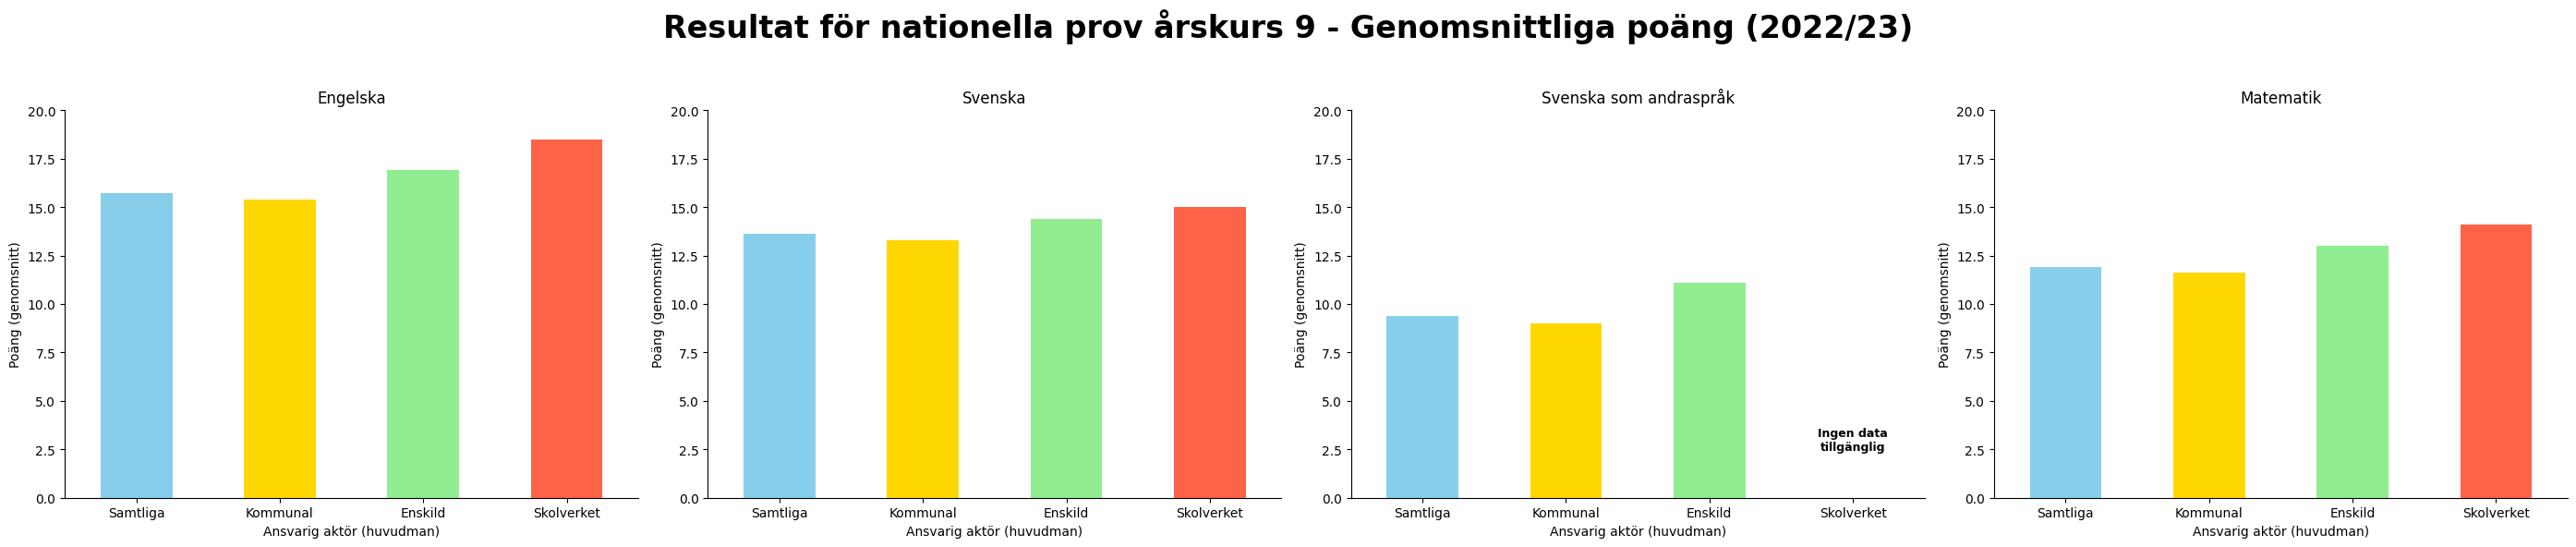

In [184]:
# Subject names for titles for the subplots
subject_titles = ["Engelska", "Svenska", "Svenska som andraspråk", "Matematik"]

# Create a figure with 1 row and 4 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(len(df_list)*7, 6)) # Tip from Andreas to use len(df_list) to make the figure width dynamic

# Loop through each dataframe and plot in the corresponding subplot
for i, df in enumerate(df_list):
    df.plot(
        x='Huvudman', 
        y='Totalt (poäng)', 
        kind='bar', 
        ax=axes[i], 
        legend=False,  # Hide legend
        color=['skyblue', 'gold', 'lightgreen', 'tomato']  # Set color palette
    )
    
    axes[i].set_title(subject_titles[i])  # Set title for each subplot based on the subject_titles list
    axes[i].set_ylabel("Poäng (genomsnitt)")  # Label for the y-axis
    axes[i].set_xlabel("Ansvarig aktör (huvudman)")  # Label for the x-axis
    axes[i].set_ylim(0,20) # Set the y-axis limits to 0-20 so that the bars are comparable
    axes[i].spines[['top', 'right']].set_visible(False)  # Hide the top and right border
    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=0)

# Title for the entire graph
fig.suptitle("Resultat för nationella prov årskurs 9 - Genomsnittliga poäng (2022/23)", fontsize=24, fontweight = 'bold')

# Add annotation for the "Svenska som andrapspråk" subplot for the Skolverket bar since there is no data available/reported to them
axes[2].annotate('Ingen data\ntillgänglig',
                xy=(1, 2),
                xytext=(3, 3),
                fontsize=9, fontweight='bold', color='black',
                rotation=0, ha='center', va='center')


# Adjust layout to avoid overlapping
fig.tight_layout(rect=[0, 0, 1, 0.95])


---

### Assignment 2

##### Dataframe creation and cleaning

In [185]:
# Read the data from the relevant sheet (Tabell 1B) in the XLSX file and store in a dataframe
df_table_1b = pd.read_excel('data/betyg_o_prov_riksnivå.xlsx', sheet_name='Tabell 1B', header=7)

# Renaming of the year ('År') column to make it more readable
df_table_1b_filtered = df_table_1b.rename(columns={"Unnamed: 0": "År"})

# Filtering of the rows I need (years 2018-2023)
df_table_1b_filtered = df_table_1b_filtered.loc[0:4]

# Filtering of the columns I need (0, 7-9)
df_missing_grade = df_table_1b_filtered.iloc[:, [0, 7, 8, 9]]

# Renaming of the columns to make them more readable
df_missing_grade = df_missing_grade.rename(columns={"Totalt.2": "Totalt",
                                                    "Flickor.2": "Flickor",
                                                    "Pojkar.2": "Pojkar"}
                                                    )

df_missing_grade # To check the values

,År,Totalt,Flickor,Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


##### Plotting (missing grades)

In [186]:
# Fig object to use with plotly express to create a line diagram
fig_missing_grade = px.line(
    df_missing_grade,
    x='År',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Elever som saknar betyg i minst ett ämne',
    labels={'År': 'Läsår', 'value': 'Andel (%)', 'variable': 'Kategori'},
)

# Annotation in the top right corner to state source of the data
fig_missing_grade.add_annotation(
    text="Data från Skolverket, läsåren 2018/19-2022/23",
    xref="paper", # Reference to the x-axis range
    yref="paper", # Reference to the y-axis range
    x=1.15,
    y=1.25,
    showarrow=False # No arrow
)

fig_missing_grade.show()

___

##### Plotting (merit value for 16 subjects)

In [187]:
# Here I need the same rows but other columns, so I reuse the dataframe df_table_1b_filtered
# Instead I need the first four columns, so I filter out the rest
df_merit_16 = df_table_1b_filtered.iloc[:, :4]

# Fig object to use with plotly express to create a line diagram
fig_merit_16 = px.line(
    df_merit_16,
    x='År',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Elevers meritvärde',
    subtitle='Beräknat på betyg i 16 ämnen',
    labels={'År': 'Läsår', 'value': 'Poäng i meritvärde', 'variable': 'Kategori'}
)

# Annotation in the top right corner to state source of the data
fig_merit_16.add_annotation(
    text="Data från Skolverket, läsåren 2018/19-2022/23",
    xref="paper", # Reference to the x-axis range
    yref="paper", # Reference to the y-axis range
    x=1.15,
    y=1.25,
    showarrow=False # No arrow
)

fig_merit_16.show()

___

##### Exploration of other variables

I started by looking through the excel file for something I could look at. I noticed data for students based on the following:
1. Parents highest education

2. Foreign students birth location and/or when they migrated to Sweden


In [188]:
# Creation of necessary dataframes for parents highest education
df_parents = df_table_1b.iloc[22:25]
df_parents = df_parents.rename(columns={"Unnamed: 0": "Utbildningstyp"})

##### Merit value

In [189]:
# Parents merit value
df_parents_merit = df_parents.iloc[:, 0:4]
df_parents_merit = df_parents_merit.reset_index(drop=True)

df_parents_merit

,Utbildningstyp,Totalt,Flickor,Pojkar
0,Förgymnasial utbildning,163.8,172.2,155.8
1,Gymnasial utbildning,197.4,207.2,188.2
2,Eftergymnasial utbildning,239.1,247.9,230.7


In [190]:
# Fig object to use with plotly express to create a bar chart
fig_parents_merit = px.bar(
    df_parents_merit,
    barmode='group',
    x='Utbildningstyp',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Elevers meritvärde',
    subtitle='Beräknat på betyg i 16 ämnen, baserat på föräldrarnas högsta utbildning',
    labels={'value': 'Poäng i meritvärde', 'variable': 'Kategori'}
)

# Annotation in the top right corner to state source of the data
fig_parents_merit.add_annotation(
    text="Data från Skolverket, läsåret 2022/23",
    xref="paper", # Reference to the x-axis range
    yref="paper", # Reference to the y-axis range
    x=1.15,
    y=1.25,
    showarrow=False # No arrow
)

fig_parents_merit.show()

##### Conclusion
With this graph you can clearly see the relation between the parents higher education and the students grades - the higher the education the parent(s) have gone through, the higher merit value the student has.

___

##### Missing grades

In [191]:
# Parents missing grade(s)
df_parents_missing_grade = df_parents.iloc[:, [0, 7, 8, 9]] 
df_parents_missing_grade = df_parents_missing_grade.reset_index(drop=True)
df_parents_missing_grade = df_parents_missing_grade.rename(columns={"Totalt.2": "Totalt", "Flickor.2": "Flickor", "Pojkar.2": "Pojkar"})

df_parents_missing_grade

,Utbildningstyp,Totalt,Flickor,Pojkar
0,Förgymnasial utbildning,63.5,61.5,65.3
1,Gymnasial utbildning,37.4,35.2,39.5
2,Eftergymnasial utbildning,16.8,16.1,17.5


In [192]:
# Fig object to use with plotly express to create a bar chart
fig_parents_missing_grade = px.bar(
    df_parents_missing_grade,
    barmode='group',
    x='Utbildningstyp',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Elever som saknar betyg i minst ett ämne',
    subtitle='Baserat på föräldrarnas högsta utbildning',
    labels={'value': 'Andel elever (%)', 'variable': 'Kategori'}
)

# Annotation in the top right corner to state source of the data
fig_parents_missing_grade.add_annotation(
    text="Data från Skolverket, läsåret 2022/23",
    xref="paper", # Reference to the x-axis range
    yref="paper", # Reference to the y-axis range
    x=1.15,
    y=1.25,
    showarrow=False # No arrow
)

fig_parents_missing_grade.show()

##### Conclusion
With this graph you can clearly see that the higher the education that a students parents have gone through, the lower percentage of students has missing grades.

___

##### Student background

In [193]:
# Creation of necessary dataframes for student background
df_student_background = df_table_1b.iloc[15:18]
df_student_background = df_student_background.rename(columns={"Unnamed: 0": "Grupp"})

df_student_background

,Grupp,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
15,Födda i Sverige,215.5,224.7,206.6,223.0,232.8,213.5,32.6,30.8,34.3
16,"Födda utomlands, inv. före 2014",217.4,227.6,208.0,224.8,235.8,214.7,32.0,29.8,34.0
17,"Födda utomlands, inv. 2014 el. senare",182.1,193.1,171.8,186.1,197.7,175.1,54.3,51.1,57.2


##### Merit value

In [194]:
# Merit value
df_student_background_merit = df_student_background.iloc[:, 0:4]
df_student_background_merit = df_student_background_merit.reset_index(drop=True)

# I got the below idea from Chat GPT, based on my problem formulation
# and initial idea of adding a row break to the value.
# I create a new column named 'Grupp_wrapped', where I add the necessary
# line breaks to prevent x-label overlapping in the plotly express-graphs.
df_student_background_merit['Grupp_wrapped'] = df_student_background_merit['Grupp'].replace(
    {
        'Födda utomlands, inv. före 2014': 'Födda utomlands<br>(inv. före 2014)',
        'Födda utomlands, inv. 2014 el. senare': 'Födda utomlands<br>(inv. 2014 el. senare)'
    }
)

df_student_background_merit

,Grupp,Totalt,Flickor,Pojkar,Grupp_wrapped
0,Födda i Sverige,215.5,224.7,206.6,Födda i Sverige
1,"Födda utomlands, inv. före 2014",217.4,227.6,208.0,Födda utomlands<br>(inv. före 2014)
2,"Födda utomlands, inv. 2014 el. senare",182.1,193.1,171.8,Födda utomlands<br>(inv. 2014 el. senare)


In [195]:
# Fig object to use with plotly express to create a bar chart
fig_student_background_merit = px.bar(
    df_student_background_merit,
    barmode='group',
    x='Grupp_wrapped',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Meritvärde för elever med utländsk bakgrund',
    subtitle='Beräknat på betyg i 16 ämnen, baserat på födelseplats och/eller invandringsår',
    labels={'value': 'Poäng', 'variable': 'Kategori', 'Grupp_wrapped': 'Grupp'}
)

fig_student_background_merit.update_xaxes(tickangle=0) # Found how to do this on Stackoverflow
fig_student_background_merit.update_yaxes(range=[150, None]) # Got to know about range=[] from ChatGPT
# I don't know if changing the range is a good or bad idea in Data Story-telling.
# It creates a bigger contrast between the different groups, which could potentially
# be misleading, but at the same time it clearly shows that there is a different.
# Since the graph is interactive, this might not be necessary since the user themself
# could instead choose to zoom in on the bars to increase the contrast between them.

# Annotation in the top right corner to state source of the data
fig_student_background_merit.add_annotation(
    text="Data från Skolverket, läsåret 2022/23",
    xref="paper", # Reference to the x-axis range
    yref="paper", # Reference to the y-axis range
    x=1.15,
    y=1.25,
    showarrow=False # No arrow
)

fig_student_background_merit.show()

##### Conclusion
The merit values don't differ much between students born in Sweden and students born outside of Sweden that migrated here before 2014. But there is a decrease in merit values for the non-Sweden-born students that migrated here after 2014.

___

##### Missing grades

In [196]:
# Missing grades
df_student_background_missing_grade = df_student_background.iloc[:, [0, 7, 8, 9]]
df_student_background_missing_grade = df_student_background_missing_grade.reset_index(drop=True)
df_student_background_missing_grade = df_student_background_missing_grade.rename(columns={"Totalt.2": "Totalt", "Flickor.2": "Flickor", "Pojkar.2": "Pojkar"})

# I got the below idea from Chat GPT, based on my problem formulation
# and initial idea of adding a row break to the value.
# I create a new column named 'Grupp_wrapped', where I add the necessary
# line breaks to prevent x-label overlapping in the plotly express-graphs.
df_student_background_missing_grade['Grupp_wrapped'] = df_student_background_missing_grade['Grupp'].replace(
    {
        'Födda utomlands, inv. före 2014': 'Födda utomlands<br>(inv. före 2014)',
        'Födda utomlands, inv. 2014 el. senare': 'Födda utomlands<br>(inv. 2014 el. senare)'
    }
)

df_student_background_missing_grade

,Grupp,Totalt,Flickor,Pojkar,Grupp_wrapped
0,Födda i Sverige,32.6,30.8,34.3,Födda i Sverige
1,"Födda utomlands, inv. före 2014",32.0,29.8,34.0,Födda utomlands<br>(inv. före 2014)
2,"Födda utomlands, inv. 2014 el. senare",54.3,51.1,57.2,Födda utomlands<br>(inv. 2014 el. senare)


In [197]:
# Fig object to use with plotly express to create a bar chart
fig_student_background_missing_grade = px.bar(
    df_student_background_missing_grade,
    barmode='group',
    x='Grupp_wrapped',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Utländska elever som saknar betyg i minst ett ämne',
    subtitle='Baserat på födelseplats och/eller invandringsår',
    labels={'value': 'Andel elever (%)', 'variable': 'Kategori', 'Grupp_wrapped': 'Grupp'}
)

fig_student_background_missing_grade.update_xaxes(tickangle=0) # Found how to do this on Stackoverflow

# Annotation in the top right corner to state source of the data
fig_student_background_missing_grade.add_annotation(
    text="Data från Skolverket, läsåret 2022/23",
    xref="paper", # Reference to the x-axis range
    yref="paper", # Reference to the y-axis range
    x=1.15,
    y=1.25,
    showarrow=False # No arrow
)

fig_student_background_missing_grade.show()

##### Conclusion
Here you can see the same pattern - the percentage of students that is missing one or more grades have increased, and almost doubled (!), from before 2014 to after 2014. The difference between students with foreign background that is born in Sweden and students born outside of Sweden that came here before 2014 is minimal.
It would be very interesting to explore data for different subjects to see if there are any patterns there too, or if this is just a general increase in missing grades.

___

### Exporting to .png and .html

##### Saving matplotlib graph as .png

In [198]:
# This figure contains four subplots, each representing one of the following subjects:
# 'Engelska', 'Svenska', 'Svenska som andraspråk', and 'Matematik'.
# Each subplot displays the average total points for students (combined boys and girls) across different 'huvudmän'.
# 'Huvudman' refers to the entity responsible for operating the school:
# - 'Samtliga' (All): Represents the combined data from all school operators.
# - 'Kommunal' (Municipal): Schools operated by the municipality.
# - 'Enskild' (Independent): Privately operated schools.
# - 'Skolverket' (Swedish National Agency for Education): Represents national-level data.
# The x-axis shows these 'huvudmän', and the y-axis represents the average total points.
fig.savefig("visualiseringar/subject_average_points.png", dpi=300, bbox_inches='tight')

##### Saving plotlyexpress graphs as .html

In [199]:
# Students missing one or more grades (2018/19–2022/23)  
# This line graph shows the percentage of students missing at least one grade over time.  
fig_missing_grade.write_html("visualiseringar/over_time_grades_missing.html")

# Students' merit value (2018/19–2022/23)  
# Merit value is calculated based on students' grades in 16 subjects.  
fig_merit_16.write_html("visualiseringar/over_time_merit_value.html")

# ---------- Exploratory graphs ----------

# Merit value based on parents' highest education (2022/23)  
# This bar chart shows how students' merit value varies with their parents' education level.  
fig_parents_merit.write_html("visualiseringar/parents_merit.html")

# Percentage of students missing one or more grades based on parents' highest education (2022/23)  
# This bar chart shows how the percentage of students with one or more missing grades varies with parents' education level.  
fig_parents_missing_grade.write_html("visualiseringar/parents_grades_missing.html")

# Merit value based on student background (2022/23)  
# This bar chart compares students' merit value based on whether they were born in Sweden  
# or migrated, and if they migrated, whether it was before or after 2014.  
fig_student_background_merit.write_html("visualiseringar/background_merit.html")

# Percentage of students missing one or more grades based on student background (2022/23)  
# This bar chart shows the percentage of students with missing grades based on whether they
# were born in Sweden or migrated, and if they migrated, whether it was before or after 2014.
fig_student_background_missing_grade.write_html("visualiseringar/background_grades_missing.html")